# Final Evaluation

In this notebook I will use Logistic Regression and perform a final evaluation using the test set to get an idea of how well the model will work when put into production

In [11]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 1 Import Data

In [2]:
train = pd.read_csv("train_engineered.csv")
test = pd.read_csv("test_engineered.csv")

train.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [5]:
# split x and y variables
X_train, y_train = train.drop("class_p", axis=1), train.class_p
X_test, y_test = test.drop("class_p", axis=1), test.class_p

# 2 Modeling

In [6]:
model = LogisticRegression(C=5, tol=0.0001)

In [9]:
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print("training results")
print(classification_report(y_train, train_pred))

test_pred = model.predict(X_test)
print("\n\n\n validation results")
print(classification_report(y_test, test_pred))

training results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2357
           1       1.00      1.00      1.00      2212

    accuracy                           1.00      4569
   macro avg       1.00      1.00      1.00      4569
weighted avg       1.00      1.00      1.00      4569




 validation results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 3 Coeficient Analysis

Now I will see which features of the mushrooms were most important

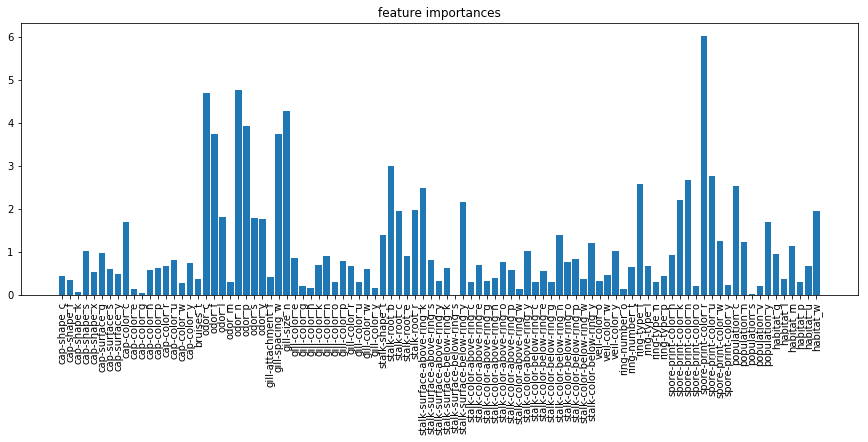

In [17]:
# plot coefficients
plt.figure(figsize=(15, 5))
plt.bar(train.drop("class_p", axis=1).columns, abs(model.coef_[0]))
plt.title("feature importances")
plt.xticks(rotation=90)
plt.show()

It seems that the color, odor, gills, and spore color are the most important features of the mushrooms